In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [16]:
# Configuration
IMG_SIZE = 240
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 3

DATA_DIR = "../data/raw"   # sesuaikan jika notebook di folder notebooks


In [17]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [18]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,819 (49.36 MB)

 Trainable params: 12,938,819 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.6264 - loss: 0.9699 - val_accuracy: 0.7111 - val_loss: 0.4857
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 975ms/step - accuracy: 0.8792 - loss: 0.2834 - val_accuracy: 0.6833 - val_loss: 0.5495
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 938ms/step - accuracy: 0.9194 - loss: 0.2177 - val_accuracy: 0.7500 - val_loss: 0.6683
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 883ms/step - accuracy: 0.9417 - loss: 0.1818 - val_accuracy: 0.8111 - val_loss: 0.4400
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 867ms/step - accuracy: 0.9500 - loss: 0.1411 - val_accuracy: 0.8833 - val_loss: 0.2565
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 944ms/step - accuracy: 0.9667 - loss: 0.0912 - val_accuracy: 0.9000 - val_loss: 0.3078
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 931ms/step - accuracy: 0.9778 - loss: 0.0552 - val_accuracy: 0.8556 - val_loss: 0.3965
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9750 - loss: 0.0649 - val_accuracy: 

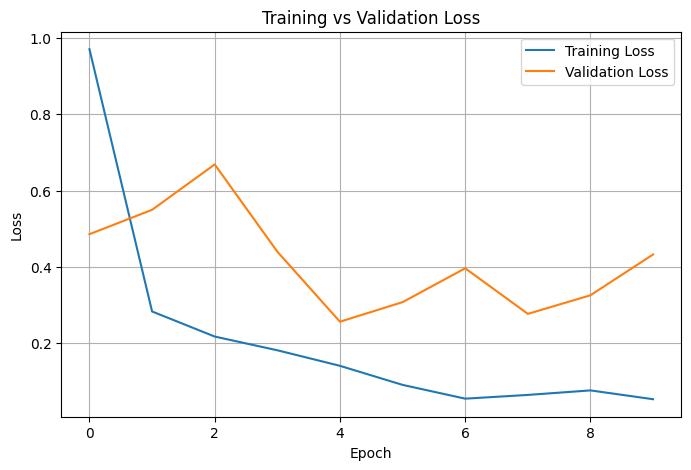

In [20]:
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


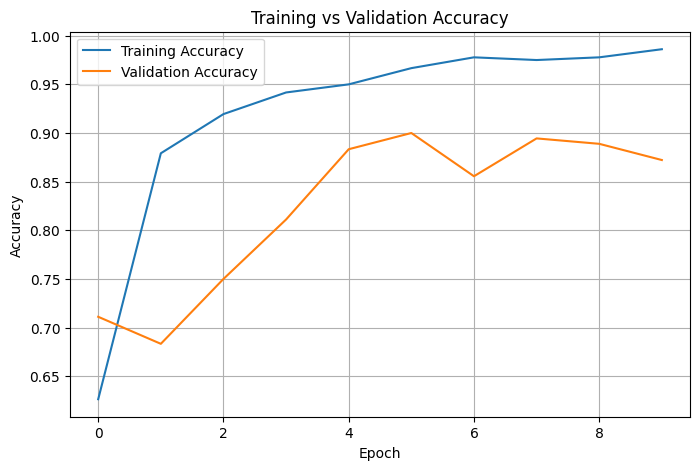

In [21]:
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
os.makedirs("../outputs/models", exist_ok=True)
model.save("../outputs/models/tire_cnn.h5")
print("Model saved successfully")


Model saved successfully


### Conclusion

The CNN model successfully learns discriminative visual features from tire images.
The loss and accuracy curves indicate stable convergence with no severe overfitting.
This confirms that Conv2D-based deep learning is effective for tire condition classification.
